In [1]:
import matplotlib.pyplot as plt

import numpy as np
from scipy.fft import ifft

from timescales.conversions import convert_knee, psd_to_acf, acf_to_psd
from timescales.utils import normalize
from timescales.sim import sim_lorentzian, sim_exp_decay

from timescales.plts import set_default_rc
set_default_rc()

# 01. Timescales Introduction

Timescales refer the the time it takes for a process to complete and may be quanitfied using power spectral density or the autocorrelation function. Timescales are equal to the knee frequency of the PSD, modeled using a Lorentzian function. In the ACF, timescales are equal to tau, the inverse of the exponential decay rate. The relation between the knee frequency and tau is:

```
tau = 1. / (2 * np.pi * knee_freq)
```

This tutorial descibes the ACF and PSD models and future tutorials will describe how to fit these models to simulated or real data.

#### PSD
In the PSD, timescales are defined as the transition from constant log-log power to linearly decaying log-log power.

In [2]:
# Settings
fs = 1000
knee_freq = 10
tau = convert_knee(knee_freq)

# Simulate
freqs = np.linspace(0, 2000, 4001)
powers = sim_lorentzian(freqs, knee_freq, constant=1e-4)

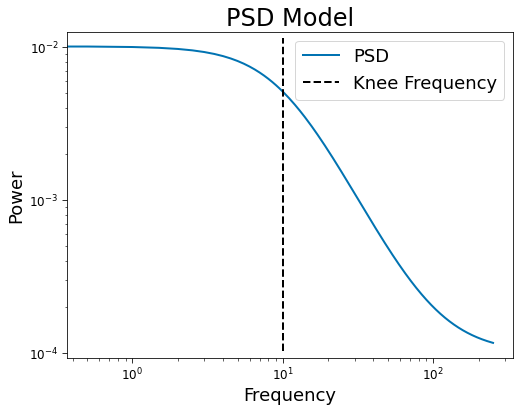

In [3]:
# Plot
plt.figure(figsize=(8, 6))
plt.title('PSD Model')
plt.loglog(freqs[:500], powers[:500], label='PSD')
plt.axvline(knee_freq, .02, .98, color='k', ls='--', label='Knee Frequency')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.legend();

#### ACF

In the ACF, timescales are defined as the inverse of the exponential decay rate.

In [4]:
# Simulate
lags = np.arange(0, 1001)
lags = np.linspace(0, 2000, 4001)
corrs = sim_exp_decay(lags, fs, tau, 1)

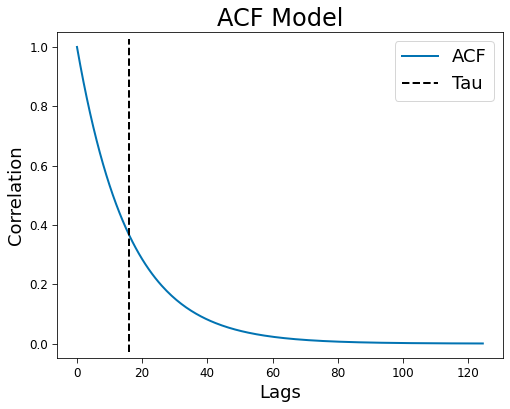

In [5]:
# Plot
plt.figure(figsize=(8, 6))
plt.title('ACF Model')
plt.plot(lags[:250], corrs[:250], label='ACF')
plt.axvline(tau * fs, .02, .98, color='k', ls='--', label='Tau')
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.legend();

#### Wiener–Khinchin Theorem

The Wiener–Khinchin Theorem descibes the relationship between the PSD and ACF uing the (inverse) Fourier transform. Below, this equivalence is demonstrated.

In [6]:
# iFFT
lags_ifft, corrs_ifft = psd_to_acf(freqs, powers, fs)
freqs_ifft, powers_ifft = acf_to_psd(lags, corrs, fs)

# Trim ranges and normalize
freqs = freqs[1:501]
freqs_ifft = freqs[:500]

powers = normalize(powers[1:501], 1e-2, 1)
powers_ifft = normalize(powers_ifft[:500], 1e-2, 1)

lags = lags[1:201]
lags_ifft = lags[:200]

corrs = normalize(corrs[1:201], 0, 1)
corrs_ifft = normalize(corrs_ifft[:200], 0, 1)

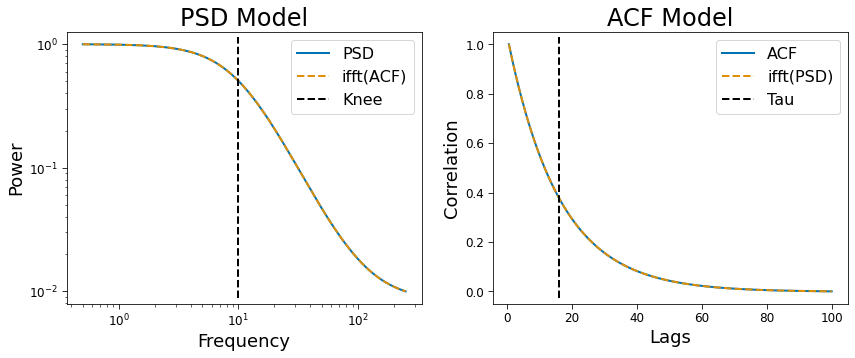

In [7]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 5))

axes[0].loglog(freqs, powers, label='PSD')
axes[0].loglog(freqs_ifft, powers_ifft, ls='--', label='ifft(ACF)')

axes[1].plot(lags, corrs, label='ACF')
axes[1].plot(lags_ifft, corrs_ifft, ls='--', label='ifft(PSD)')

axes[0].axvline(knee_freq, .02, .98,
                color='k', ls='--', label='Knee')

axes[1].axvline(convert_knee(knee_freq) * fs, .02, .98,
                color='k', ls='--', label='Tau')

axes[0].set_title('PSD Model')
axes[1].set_title('ACF Model')

axes[0].set_ylabel('Power')
axes[0].set_xlabel('Frequency')

axes[1].set_ylabel('Correlation')
axes[1].set_xlabel('Lags')

axes[0].legend(fontsize=16)
axes[1].legend(fontsize=16);